In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
cars=pd.read_csv('car data.csv')
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
cars['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [7]:
cars['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

**LINEAR** **REGRESSION**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


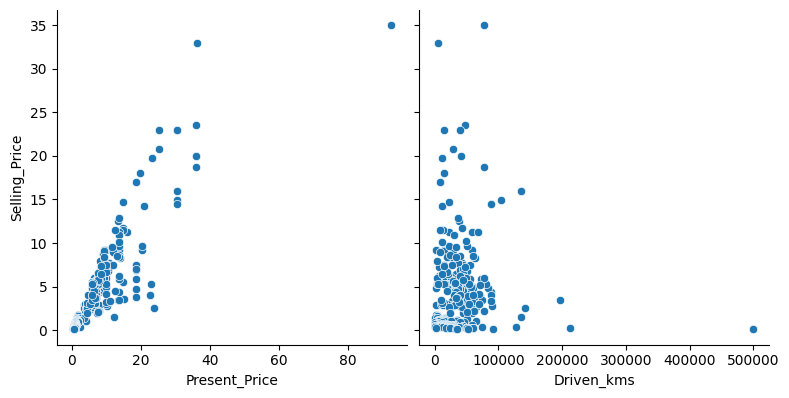

In [8]:
#plotting a pairplot to understand multicollinearity
sns.pairplot(cars,x_vars=['Present_Price','Driven_kms'],y_vars='Selling_Price',size=4,aspect=1,kind='scatter')

<ipython-input-9-107bab1c596e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars.corr(), cmap = 'RdBu', annot = True )


<Axes: >

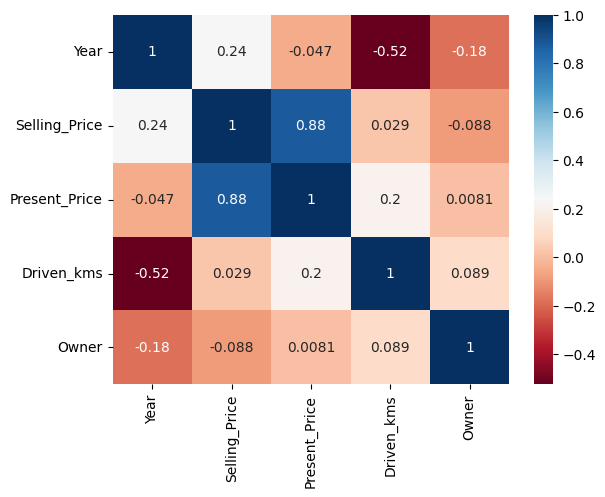

In [9]:
#plotting a heatmap to understand correlation
sns.heatmap(cars.corr(), cmap = 'RdBu', annot = True )

In [10]:
X=cars.Present_Price
Y=cars.Selling_Price
x1=X.to_numpy()
y1=Y.to_numpy()
x2=x1.reshape(-1,1)
y2=y1.reshape(-1,1)

In [33]:
#train test split to divide training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x2, y2, train_size = 0.7, test_size = 0.3, random_state = 0 )

In [34]:
from sklearn.linear_model import LinearRegression
geek=LinearRegression()

In [35]:
geek.fit(X_train,y_train)

LinearRegression()

In [36]:
#slope and intercept values of the linearRegression line
print(geek.intercept_)
print(geek.coef_)

[0.88095115]
[[0.469235]]


In [105]:
y_pred=geek.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
y_predu=geek.predict(X_train)
scoreX=r2_score(y_train,y_predu)
print("Root Mean Squared error value is:",rmse)
print("R^2 value for testing data:",score)
print("R^2 value for training data:",scoreX)
print("MSE cost function is:",mse)

Root Mean Squared error value is: 2.7913584863195067
R^2 value for testing data: 0.7394613982313984
R^2 value for training data: 0.7765662314248356
MSE cost function is: 7.791682199147928


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

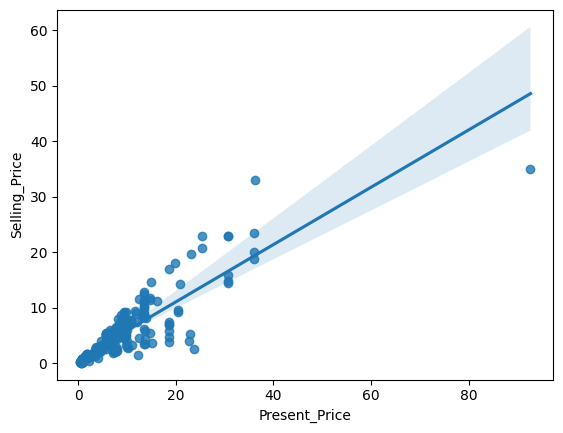

In [38]:
sns.regplot(x=cars['Present_Price'],y=cars['Selling_Price'])

**DECISION TREE MODEL**

In [52]:
#importing decision tree model
from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor(criterion='absolute_error')
dec.fit(X_train,y_train)
y_pred2=dec.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
score1=r2_score(y_test,y_pred2)
mse1=mean_squared_error(y_test,y_pred2)
rmse2=np.sqrt(mse1)
y_preds=dec.predict(X_train)
score2=r2_score(y_train,y_preds)
score2
print("Root Mean Sq error is: ", rmse2)
print("R^2 score for test data is: ", score1)
print("R^2 score for train data is: ", score2)
print("Mean Squared error is:", mse1)

Root Mean Sq error is:  3.1635301171630723
R^2 score for test data is:  0.6653546504016985
R^2 score for train data is:  0.9541455255212187
Mean Squared error is: 10.007922802197802


**RANDOM FOREST**

In [71]:
#importing Random forest model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=40)
rf.fit(X_train,y_train)
y_pred_rf_test=rf.predict(X_test)
y_pred_rf_train= rf.predict(X_train)

<ipython-input-71-0311e8ecbd66>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [72]:
score_rf_test=r2_score(y_test,y_pred_rf_test)
mse_rf=mean_squared_error(y_test,y_pred_rf_test)
rmse_rf=np.sqrt(mse_rf)
score_rf_train=r2_score(y_train,y_pred_rf_train)
print("Root Mean Sq error is: ", rmse_rf)
print("R^2 score for test data is: ", score_rf_test)
print("R^2 score for train data is: ", score_rf_train)
print("Mean Squared error is:", mse_rf)

Root Mean Sq error is:  3.1138516993296084
R^2 score for test data is:  0.6757823172727764
R^2 score for train data is:  0.9415583104132895
Mean Squared error is: 9.696072405417889


**XGBOOST**

In [73]:
#importing Extreme Gradient Boosting model
import xgboost as xgb
sexy=xgb.XGBRegressor()
sexy.fit(X_train,y_train)
y_pred_xgb_test=sexy.predict(X_test)
y_pred_xgb_train= sexy.predict(X_train)

In [74]:
score_xgb_test=r2_score(y_test,y_pred_xgb_test)
mse_xgb=mean_squared_error(y_test,y_pred_xgb_test)
rmse_xgb=np.sqrt(mse_xgb)
score_xgb_train=r2_score(y_train,y_pred_xgb_train)
print("Root Mean Sq error is: ", rmse_xgb)
print("R^2 score for test data is: ", score_xgb_test)
print("R^2 score for train data is: ", score_xgb_train)
print("Mean Squared error is:", mse_xgb)

Root Mean Sq error is:  3.3557104500485093
R^2 score for test data is:  0.6234611358339122
R^2 score for train data is:  0.9609633420251601
Mean Squared error is: 11.260792624564768


**ADABOOST**

In [97]:
#importing Adaptive Boosting model with base estimator : Linear regression
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=geek)


In [98]:
ada.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=LinearRegression())

In [99]:

y_pred_ada_test=ada.predict(X_test)
y_pred_ada_train= ada.predict(X_train)

In [100]:
score_ada_test=r2_score(y_test,y_pred_ada_test)
mse_ada=mean_squared_error(y_test,y_pred_ada_test)
rmse_ada=np.sqrt(mse_ada)
score_ada_train=r2_score(y_train,y_pred_ada_train)
print("Root Mean Sq error is: ", rmse_ada)
print("R^2 score for test data is: ", score_ada_test)
print("R^2 score for train data is: ", score_ada_train)
print("Mean Squared error is:", mse_ada)

Root Mean Sq error is:  2.7719598416462405
R^2 score for test data is:  0.743070059731032
R^2 score for train data is:  0.7675796966517308
Mean Squared error is: 7.683761363699451


**SUMMARY**

In [107]:
#cumulative summary of r^2 values of train and test data of each model
models = pd.DataFrame({ 'Model': ['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'XGBoost Regressor'],
                       'Training R2_Score': [scoreX,score2,score_ada_train,score_rf_train,score_xgb_train],

                       'Testing R2_Score': [score,score1,score_ada_test,score_rf_test,score_xgb_test]})
models.sort_values(by = ['Training R2_Score', 'Testing R2_Score'], ascending = False, ignore_index = True)

,Model,Training R2_Score,Testing R2_Score
0,XGBoost Regressor,0.960963,0.623461
1,Random Forest Regressor,0.941558,0.675782
2,Linear Regressor,0.776566,0.739461
3,Decision Tree Regressor,0.776566,0.665355
4,ADABoost Regressor,0.767580,0.743070


In [ ]:
#Thank you!!!!!!!